In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/i-net computer/OneDrive/Desktop/DS/KNN/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
df.rename(columns={"animal name":"animalname"},inplace=True)

In [5]:
dummies=pd.get_dummies(df["animalname"])
dummies

,aardvark,antelope,bass,bear,boar,buffalo,calf,carp,catfish,cavy,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df1=pd.concat([df,dummies],axis=1)
df1=df1.drop(["animalname"],axis=1)
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
labels=df1.iloc[:,16]
features=df1.drop(["type"],axis=1)
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [10]:
def norm_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)
data=norm_func(features)
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.2)


In [12]:
from sklearn.neighbors import KNeighborsClassifier as KN
model=KN(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [13]:
Train_acc=np.mean(model.predict(X_train)==Y_train)
Train_acc

0.95

In [14]:
Test_acc=np.mean(model.predict(X_test)==Y_test)
Test_acc

0.7142857142857143

In [15]:
model1=KN(n_neighbors=6)
model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [16]:
train_acc1=np.mean(model1.predict(X_train)==Y_train)
train_acc1

0.95

In [17]:
test_acc1=np.mean(model1.predict(X_test)==Y_test)
test_acc1

0.7142857142857143

In [18]:
acc=[]

In [19]:
for i in range(6,50,2):
     model1=KN(n_neighbors=i)
     model1.fit(X_train,Y_train)
     train_accuracy=np.mean(model1.predict(X_train)==Y_train)
     test_accuracy=np.mean(model1.predict(X_test)==Y_test)
     acc.append([train_accuracy,test_accuracy])

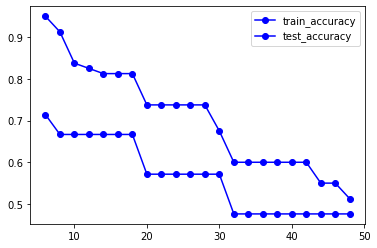

In [20]:
plt.plot(np.arange(6,50,2),[i[0] for i in acc],"bo-")
plt.plot(np.arange(6,50,2),[i[1] for i in acc],"bo-")
plt.legend(["train_accuracy", "test_accuracy"])

In [21]:
model_fin=KN(n_neighbors=24)
model_fin.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=24)

In [22]:
train_fin=np.mean(model_fin.predict(X_train)==Y_train)
train_fin


0.7375

In [23]:
test_fin=np.mean(model_fin.predict(X_test)==Y_test)
test_fin

0.5714285714285714